In [38]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

# %% Load data
mongo = pd.read_csv("./MONGO__results.csv")
mysql = pd.read_csv("./MYSQL__results.csv")

mongo['sut'] = 'mongo'
mysql['sut'] = 'mysql'

df = pd.concat([mysql, mongo])
df['throughput'] = (df['operations'] / (df['work_duration'] / 1000))


insert = df[df['benchmark_name'].str.startswith('insert_')]
query = df[df['benchmark_name'].str.startswith('query_')]
in_lg = df[(df['benchmark_name'].str.startswith('insert_long')) & (df['work_duration'] >= 10_000)]

display(in_lg)

,run_id,setup_duration,work_duration,operations,dummy_rows,benchmark_name,sut,throughput
35,36,0,10000,2807,0,insert_long,mysql,280.700000
36,37,0,10001,2976,0,insert_long,mysql,297.570243
37,38,0,10002,3045,0,insert_long,mysql,304.439112
38,39,0,10003,3030,0,insert_long,mysql,302.909127
39,40,0,10000,3042,0,insert_long,mysql,304.200000
40,41,0,10002,2991,0,insert_long,mysql,299.040192
41,42,0,10003,2946,0,insert_long,mysql,294.511647
42,43,0,10002,2890,0,insert_long,mysql,288.942212
43,44,0,10003,3069,0,insert_long,mysql,306.807958
44,45,0,10001,3109,0,insert_long,mysql,310.868913


# Analysing QUERY (read) requests

## Query UUID with different dataset sizes

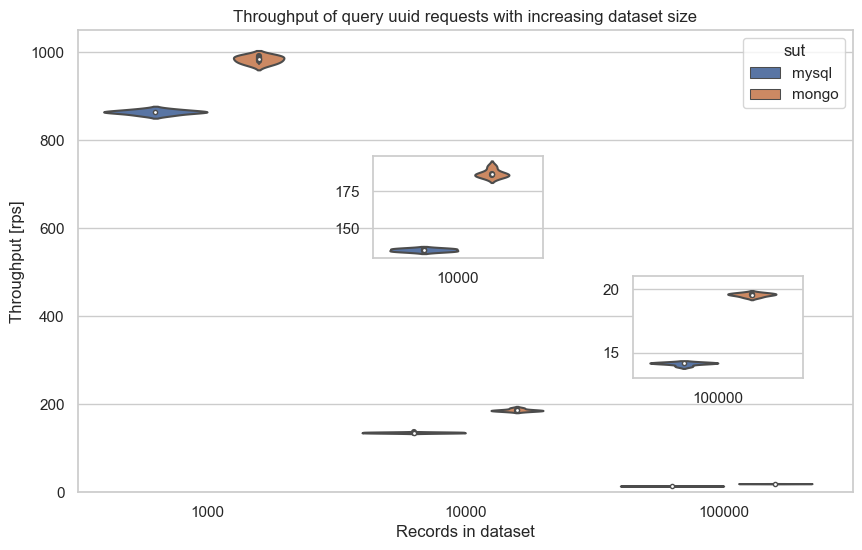

In [180]:
# Only data for query uuid benchmark
qu = query[query['benchmark_name'] == 'query_uuid']

# Set up figure and subplots
fig, ax = plt.subplots(figsize=(10, 6))


# Create boxplot
sns.violinplot(data=qu, x='dummy_rows', y='throughput', hue='sut', ax=ax)
ax.set_xlabel("Records in dataset")
ax.set_ylabel("Throughput [rps]")
ax.set_title("Throughput of query uuid requests with increasing dataset size")
ax.set_ylim(0, 1050)

ax1 = fig.add_axes([0.42, 0.5, 0.17, 0.17])
sns.violinplot(x="dummy_rows", y="throughput", hue='sut', data=qu[qu.dummy_rows.isin([10_000])], ax=ax1)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title("")
ax1.legend().set_visible(False)


ax2 = fig.add_axes([0.68, 0.3, 0.17, 0.17])
sns.violinplot(x="dummy_rows", y="throughput", hue='sut', data=qu[qu.dummy_rows.isin([100_000])], ax=ax2)
ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.set_title("")
ax2.set_ylim(13, 21)
ax2.legend().set_visible(False)

## Query all queries on 10k records

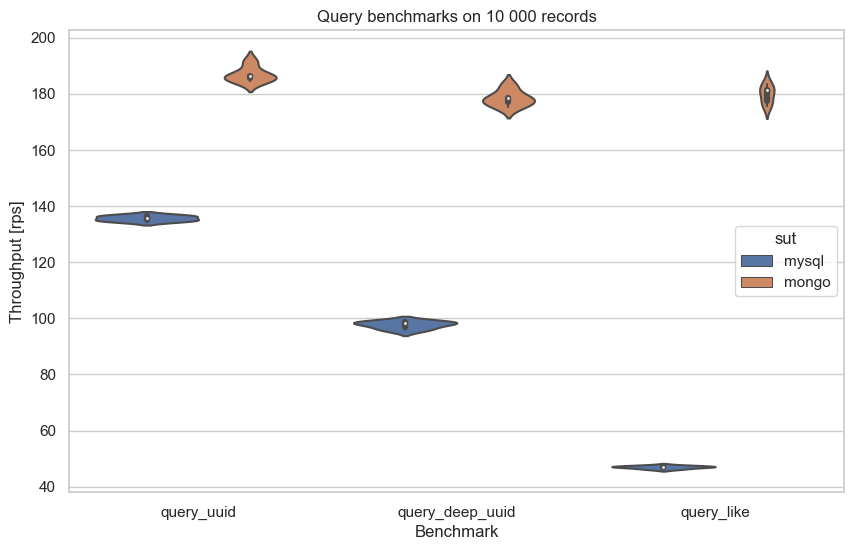

In [144]:
# Data for all query bechmarks done with 10k of dummy data
q10k = query[query['dummy_rows'] == 10_000]

# Set up figure and subplots
fig, ax = plt.subplots(figsize=(10, 6))


# Create boxplot
sns.violinplot(data=q10k, x='benchmark_name', y='throughput', hue='sut', ax=ax)
ax.set_xlabel("Benchmark")
ax.set_ylabel("Throughput [rps]")
ax.set_title("Throughput of query requests on 10k records")
sns.move_legend(ax, "center right")

# Analysing INSERT (write) requests


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


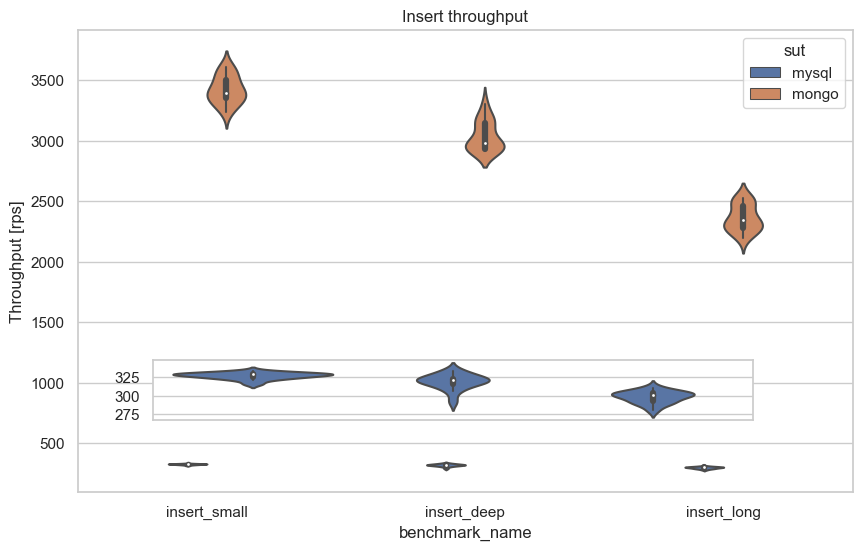

In [183]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.violinplot(data=insert, x='benchmark_name', y='throughput', hue='sut', scale="width", width=0.3, ax=ax)
ax.set_title("Insert throughput")
ax.set_ylabel("Throughput [rps]")

ax1 = fig.add_axes([0.2, 0.23, 0.6, 0.1])
sns.violinplot(x="benchmark_name", y="throughput", data=insert[insert.sut == 'mysql'], color=sns.color_palette()[0], ax=ax1)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title("")
plt.xticks([])
ax1.legend().set_visible(False)


In [ ]:
# display(all_results)

# %% Drop columns
#data.drop(columns=["bed_setup", "it_setup", "sr_setup", "ir_setup"], inplace=True)
#data.drop(columns=["it_pos", "sr_pos", "ir_pos"], inplace=True)

# %% Filter data
#filter_series = data["b_name"] == "BenchmarkScanComments/1MValidUtf8"
#single_function = data[filter_series]

# %% Simple statistics
# All functions shown here work on dataframes and series
#print("Mean")
#print(single_function.mean(numeric_only=True))
#print(single_function["ns_per_op"].mean())

#print("Median")
#print(single_function.median(numeric_only=True))
#print(single_function["ns_per_op"].median())

#print("Standard deviation")
#print(single_function.std(numeric_only=True))
#print(single_function["ns_per_op"].std())

#print("Quantiles")
#print(single_function["ns_per_op"].quantile(q=[0,0.25,0.75,1]))

# %% Transforming data
# df.loc[row,col] is an alternatve way of filtering data, which is recommended
# for setting new values. ':' is the range operator (from numpy), which
# indicates the whole range if used without start and end values.
# single_function.loc[:,"ns_per_op"] = single_function["ns_per_op"] / 1000